In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#df_small = pd.read_csv("small_preprocessed_week_24-05-2024.csv", low_memory=False)
#df_small = df_small.drop(df_small.columns[0], axis=1)

In [10]:
df_large = pd.read_csv("large_preprocessed_week_24-05-2024.csv", low_memory=False)
df_large = df_large.drop(df_large.columns[0], axis=1)

In [11]:
df = df_large

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
df.head()

,TRAFFIC_DATE,TRAINNUMBER,TRAINSERIE,TRAINSERIE_DIRECTION,STATION,ACTIVITYTYPE,DISTANCE_M,PLAN_DATETIME,REALIZED_DATETIME,DELAY,TURNOVER_INDICATOR,PREVIOUS_TRAINNUMBER,COMBINE,SPLIT,ROLLINGSTOCK_TYPE,NUMBER_CARRIAGES,DRIVER_CHANGE,DEPARTURE_SIGNAL_SHOWS_SAFE,CUM_DISTANCE_M,PLAN_TURNOVER_TIME,REALIZED_TURNOVER_TIME,MAX_DEPARTURE_TIME,PLAN_SIGNAL_SAFE_DELAY,REALIZED_SIGNAL_SAFE_DELAY,DALUREN,DAY_OF_WEEK,HOUR,DAY_OF_WEEK_sin,DAY_OF_WEEK_cos,HOUR_sin,HOUR_cos,NEEDED_PLAN_TURNOVER_TIME,NEEDED_REALIZED_TURNOVER_TIME,DIFF_TURNOVER_TIME,DIFF_TURNOVER_TIME_CAT
0,2023-01-01,11736,11700.0,E,Ut,V,0.0,2023-01-01 11:58:00+00:00,2023-01-01 11:59:02+00:00,62.0,1,NaN,0,0,DDZ,6.0,1,2023-01-01 11:57:07+00:00,24051.0,300.0,193.0,NaN,-53.0,-115.0,True,6,11,-0.781831,0.62349,2.588190e-01,-0.965926,298.0,191.0,107.0,too late
1,2023-01-01,11740,11700.0,E,Ut,V,0.0,2023-01-01 12:58:00+00:00,2023-01-01 12:57:59+00:00,-1.0,1,NaN,0,0,DDZ,6.0,1,2023-01-01 12:57:08+00:00,24051.0,300.0,279.0,NaN,-52.0,-51.0,True,6,12,-0.781831,0.62349,1.224647e-16,-1.000000,361.0,340.0,21.0,perfect
2,2023-01-01,11741,11700.0,O,Ut,V,0.0,2023-01-01 12:07:00+00:00,2023-01-01 12:07:25+00:00,25.0,1,NaN,0,0,DDZ,6.0,1,2023-01-01 12:06:07+00:00,60252.0,300.0,330.0,NaN,-53.0,-78.0,True,6,12,-0.781831,0.62349,1.224647e-16,-1.000000,335.0,365.0,-30.0,perfect
3,2023-01-01,11744,11700.0,E,Ut,V,0.0,2023-01-01 13:58:00+00:00,2023-01-01 13:58:09+00:00,9.0,1,NaN,0,0,ICM,6.0,1,2023-01-01 13:57:07+00:00,24051.0,300.0,223.0,NaN,-53.0,-62.0,True,6,13,-0.781831,0.62349,-2.588190e-01,-0.965926,351.0,274.0,77.0,too late
4,2023-01-01,11745,11700.0,O,Ut,V,0.0,2023-01-01 13:07:00+00:00,2023-01-01 13:07:20+00:00,20.0,1,NaN,0,0,ICM,6.0,1,2023-01-01 13:06:07+00:00,60252.0,300.0,349.0,NaN,-53.0,-73.0,True,6,13,-0.781831,0.62349,-2.588190e-01,-0.965926,340.0,389.0,-49.0,perfect


In [13]:
df = df[df['NUMBER_CARRIAGES'].notna()]
df["NUMBER_CARRIAGES"] = df["NUMBER_CARRIAGES"].astype(int)

C:\Users\Tim Rentenaar\AppData\Local\Temp\ipykernel_16496\368654501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NUMBER_CARRIAGES"] = df["NUMBER_CARRIAGES"].astype(int)


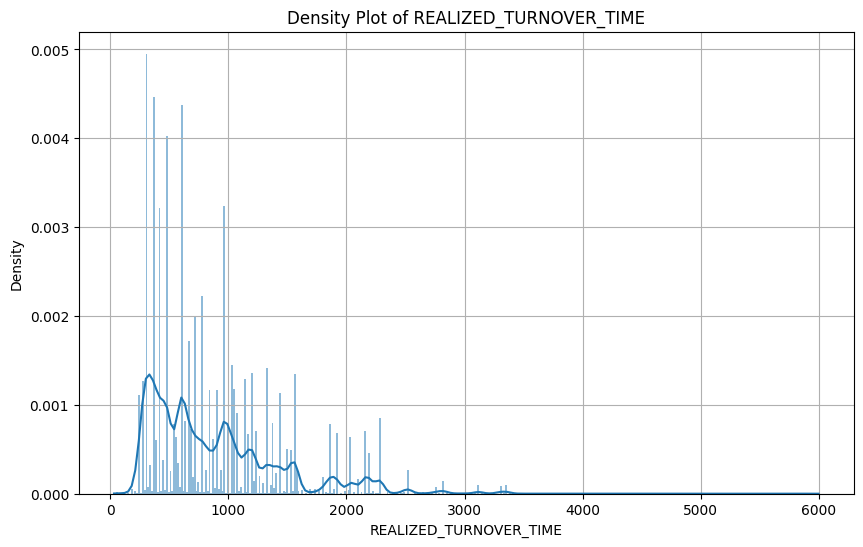

In [14]:
# Creating the density plot
plt.figure(figsize=(10, 6))
sns.histplot(df["PLAN_TURNOVER_TIME"], kde=True, stat="density", linewidth=0)
plt.title('Density Plot of REALIZED_TURNOVER_TIME')
plt.xlabel('REALIZED_TURNOVER_TIME')
plt.ylabel('Density')
plt.grid(True)
plt.show()

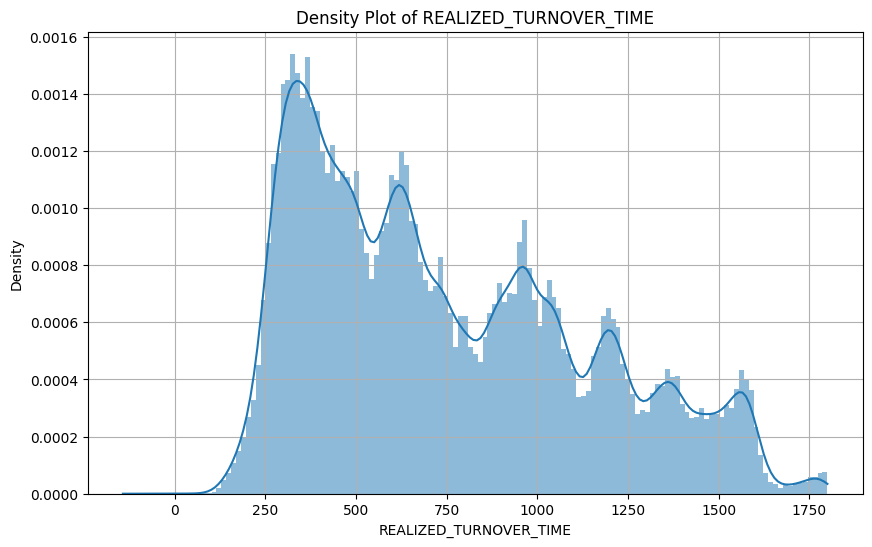

In [15]:
df = df[df["DELAY"] <= 180]
df = df[df["REALIZED_TURNOVER_TIME"] <= 1800]

# Creating the density plot
plt.figure(figsize=(10, 6))
sns.histplot(df["REALIZED_TURNOVER_TIME"], kde=True, stat="density", linewidth=0)
plt.title('Density Plot of REALIZED_TURNOVER_TIME')
plt.xlabel('REALIZED_TURNOVER_TIME')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [16]:
df = df[["REALIZED_TURNOVER_TIME", "NEEDED_REALIZED_TURNOVER_TIME", "STATION", "ROLLINGSTOCK_TYPE", "NUMBER_CARRIAGES","DRIVER_CHANGE","COMBINE","SPLIT","DAY_OF_WEEK_sin","DAY_OF_WEEK_cos","HOUR_sin","HOUR_cos"]]
df = df.dropna()
df = pd.get_dummies(df, columns=['STATION', 'ROLLINGSTOCK_TYPE'], drop_first=False)

In [17]:
y_feas = df["REALIZED_TURNOVER_TIME"]
y_need = df["NEEDED_REALIZED_TURNOVER_TIME"] - 60

X = df.drop(columns=["REALIZED_TURNOVER_TIME","NEEDED_REALIZED_TURNOVER_TIME"])

# Needed Turnover Time

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_needed = RandomForestRegressor(random_state=42, min_samples_split = 50, n_estimators = 200)

In [20]:
from sklearn.model_selection import cross_val_predict, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [21]:
# Cross-validated predictions
y_pred = cross_val_predict(rf_needed, X, y_need, cv=kf)

In [22]:
residuals = y_need - y_pred

In [23]:
y_pred_80 = y_pred + residuals.quantile(0.8)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_pinball_loss

mae = mean_absolute_error(y_need, y_pred)
mse = mean_squared_error(y_need, y_pred)
r2 = r2_score(y_need, y_pred)
pbloss = mean_pinball_loss(y_need, y_pred_80, alpha=0.8)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Pinball loss:", pbloss)

Mean Absolute Error: 115.73025608631346
Mean Squared Error: 37835.28108117006
R-squared: 0.7468383493789881
Pinball loss: 47.56153326830814


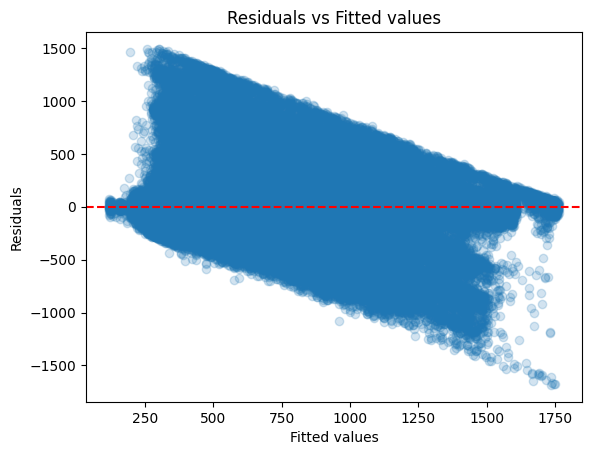

In [25]:
import matplotlib.pyplot as plt

# Plot residuals vs. fitted values
plt.scatter(y_pred, residuals, alpha=0.2)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [26]:
import joblib

rf_needed.fit(X, y_need)

joblib_file = "rf_needed.pkl"
joblib.dump(rf_needed, joblib_file)

np.save("rf_needed_residuals.npy", residuals)

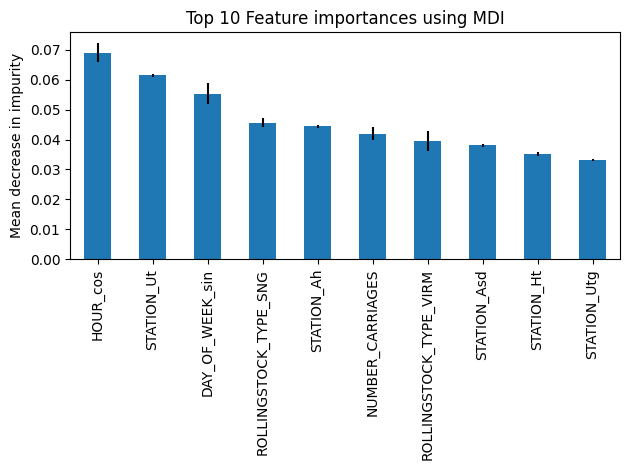

In [27]:
importances = rf_needed.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rf_needed.estimators_], axis=0)

# Sort and select the top 10 features
top_10_indices = forest_importances.nlargest(10).index
top_10_positions = [list(feature_names).index(feature) for feature in top_10_indices]
forest_importances_top_10 = forest_importances[top_10_indices]
std_top_10 = std[top_10_positions]

# Plotting the top 10 features
fig, ax = plt.subplots()
forest_importances_top_10.plot.bar(yerr=std_top_10, ax=ax)
ax.set_title("Top 10 Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()

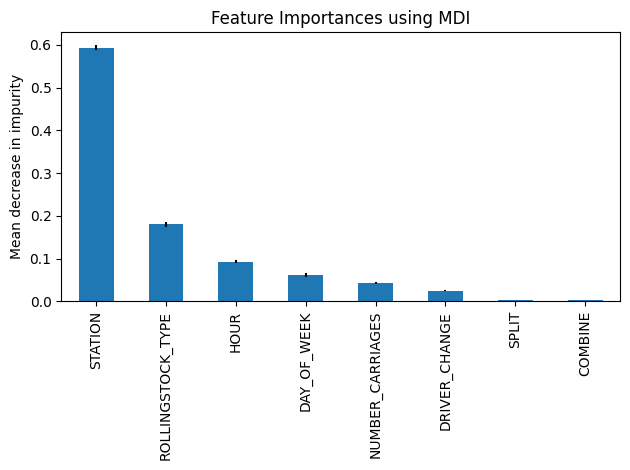

In [28]:
importances = rf_needed.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rf_needed.estimators_], axis=0)


category_feature_mapping = {
    'STATION': [col for col in feature_names if col.startswith('STATION_')],
    'ROLLINGSTOCK_TYPE': [col for col in feature_names if col.startswith('ROLLINGSTOCK_TYPE_')],
    'DAY_OF_WEEK': [col for col in feature_names if col.startswith('DAY_OF_WEEK_')],
    'HOUR': [col for col in feature_names if col.startswith('HOUR_')],
}

# Initialize dictionaries to store the summed importances and std for each category
category_importances = {}
category_std = {}

# Sum the importances for each category
for category, columns in category_feature_mapping.items():
    category_importances[category] = forest_importances[columns].sum()
    category_std[category] = np.sqrt(np.sum(std[[list(feature_names).index(col) for col in columns]]**2))

# Convert to Series for easier handling
category_importances_series = pd.Series(category_importances)
category_std_series = pd.Series(category_std)

# Include the original continuous/ordinal features in the importances
for feature in feature_names:
    if not any(feature.startswith(cat) for cat in category_feature_mapping.keys()):
        category_importances_series[feature] = forest_importances[feature]
        category_std_series[feature] = std[list(feature_names).index(feature)]

# Sort and select the top 10 features/categories
top_10 = category_importances_series.nlargest(10).index
forest_importances_top_10 = category_importances_series[top_10]
std_top_10 = category_std_series[top_10]

# Plotting the top 10 features/categories
fig, ax = plt.subplots()
forest_importances_top_10.plot.bar(yerr=std_top_10, ax=ax)
ax.set_title("Feature Importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()

# Feasible Turnover Time

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf_feas = RandomForestRegressor(random_state=42, min_samples_split = 50, n_estimators = 200)

In [30]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [31]:
# Cross-validated predictions
y_pred = cross_val_predict(rf_feas, X, y_feas, cv=kf)

In [32]:
residuals = y_feas - y_pred

In [33]:
y_pred_80 = y_pred + residuals.quantile(0.8)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_pinball_loss

mae = mean_absolute_error(y_feas, y_pred)
mse = mean_squared_error(y_feas, y_pred)
r2 = r2_score(y_feas, y_pred)
pbloss = mean_pinball_loss(y_feas, y_pred_80, alpha=0.8)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Pinball loss:", pbloss)

Mean Absolute Error: 115.06595342340789
Mean Squared Error: 37351.835212636724
R-squared: 0.7473838850369398
Pinball loss: 47.66256278061761


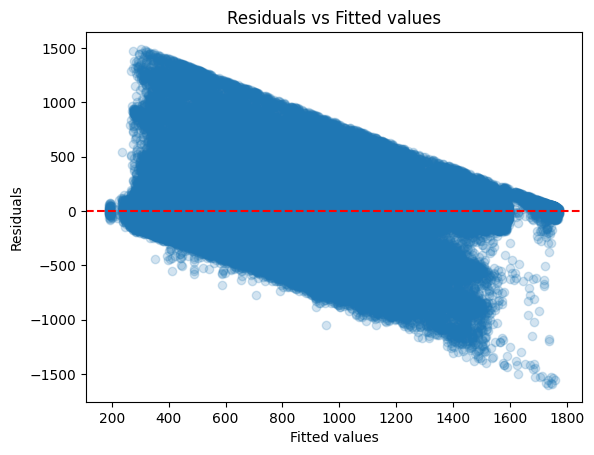

In [35]:
import matplotlib.pyplot as plt

# Plot residuals vs. fitted values
plt.scatter(y_pred, residuals, alpha=0.2)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [36]:
import joblib

rf_feas.fit(X, y_feas)

joblib_file = "rf_feas.pkl"
joblib.dump(rf_feas, joblib_file)

np.save("rf_feas_residuals.npy", residuals)

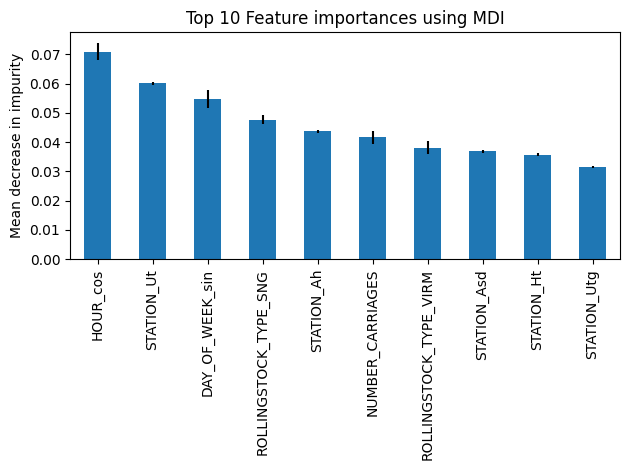

In [37]:
importances = rf_feas.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rf_feas.estimators_], axis=0)

# Sort and select the top 10 features
top_10_indices = forest_importances.nlargest(10).index
top_10_positions = [list(feature_names).index(feature) for feature in top_10_indices]
forest_importances_top_10 = forest_importances[top_10_indices]
std_top_10 = std[top_10_positions]

# Plotting the top 10 features
fig, ax = plt.subplots()
forest_importances_top_10.plot.bar(yerr=std_top_10, ax=ax)
ax.set_title("Top 10 Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()

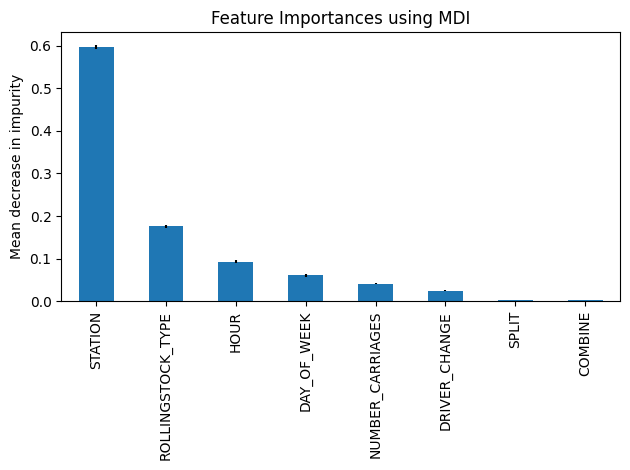

In [38]:
importances = rf_feas.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rf_feas.estimators_], axis=0)


category_feature_mapping = {
    'STATION': [col for col in feature_names if col.startswith('STATION_')],
    'ROLLINGSTOCK_TYPE': [col for col in feature_names if col.startswith('ROLLINGSTOCK_TYPE_')],
    'DAY_OF_WEEK': [col for col in feature_names if col.startswith('DAY_OF_WEEK_')],
    'HOUR': [col for col in feature_names if col.startswith('HOUR_')],
}

# Initialize dictionaries to store the summed importances and std for each category
category_importances = {}
category_std = {}

# Sum the importances for each category
for category, columns in category_feature_mapping.items():
    category_importances[category] = forest_importances[columns].sum()
    category_std[category] = np.sqrt(np.sum(std[[list(feature_names).index(col) for col in columns]]**2))

# Convert to Series for easier handling
category_importances_series = pd.Series(category_importances)
category_std_series = pd.Series(category_std)

# Include the original continuous/ordinal features in the importances
for feature in feature_names:
    if not any(feature.startswith(cat) for cat in category_feature_mapping.keys()):
        category_importances_series[feature] = forest_importances[feature]
        category_std_series[feature] = std[list(feature_names).index(feature)]

# Sort and select the top 10 features/categories
top_10 = category_importances_series.nlargest(10).index
forest_importances_top_10 = category_importances_series[top_10]
std_top_10 = category_std_series[top_10]

# Plotting the top 10 features/categories
fig, ax = plt.subplots()
forest_importances_top_10.plot.bar(yerr=std_top_10, ax=ax)
ax.set_title("Feature Importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()